In [ ]:
import sys
import cv2 #OpenCV
import numpy as np # math
import matplotlib.pyplot as plt # plotting
from scipy import ndimage, misc
from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [ ]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# Replace ------/-----/-----/' with the path such that "CSE327-HW1-Spring22" is your working directory
%cd '/content/gdrive/MyDrive/CSE327/Meng_Alex_114477057_hw1'

/content/gdrive/.shortcut-targets-by-id/15nZXn_YPaY8UJrriqTnkeuYba8afjbG2/Meng_Alex_114477057_hw1


In [ ]:

# function for image thresholding
def imThreshold(img, threshold, maxVal):
    assert len(img.shape) == 2 # input image has to be gray
    
    height, width = img.shape
    bi_img = np.zeros((height, width), dtype=np.uint8)
    for x in range(height):
        for y in range(width):
            if img.item(x, y) > threshold:
                bi_img.itemset((x, y), maxVal)
                
    return bi_img

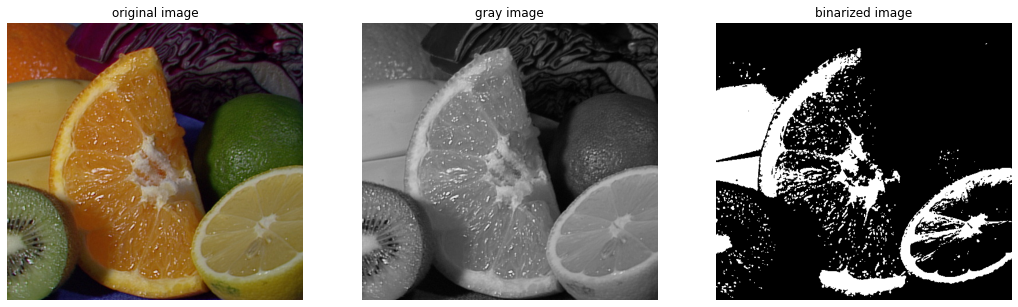

In [ ]:
# read the image for local directory (same with this .ipynb) 
img = cv2.imread('SourceImages/fruits.jpg')

# convert a color image to gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# image thresholding using global tresholder
img_bi = imThreshold(img_gray, 127, 255)

# Be sure to convert the color space of the image from
# BGR (Opencv) to RGB (Matplotlib) before you show a 
# color image read from OpenCV
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('original image')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gray, 'gray')
plt.title('gray image')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_bi, 'gray')
plt.title('binarized image')
plt.axis("off")

plt.show()

## Description
---
There are five basic image processing problems in total with specific instructions for each of them. Be sure to read **Submission Guidelines** below. They are important. This homework accounts for 100 points plus 15 **Bonus** points.

## Problems
---

- **Problem 1.a Gaussian convolution {15 pts}:** Write a function in Python that takes two arguments, a width parameter and a variance parameter, and returns a 2D array containing a Gaussian kernel of the desired dimension and variance. The peak of the Gaussian should be in the center of the array. Make sure to normalize the kernel such that the sum of all the elements in the array is 1. Use this function and the OpenCV’s `filter2D` routine to convolve the image and noisy image arrays with a 5 by 5 Gaussian kernel with sigma of 1. Repeat with a 11 by 11 Gaussian kernel with a sigma of 3. There will be four output images from this problem, namely, image convolved with 3x3, 11x11, noisy image convolved with 3x3, and 11x11. Once you fill in and run the codes, the outputs will be saved under Results folder. These images will be graded based on the difference with ground truth images. You might want to try the same thing on other images but it is not required. Include your notebook and the saved state where the output is displayed in the notebook.

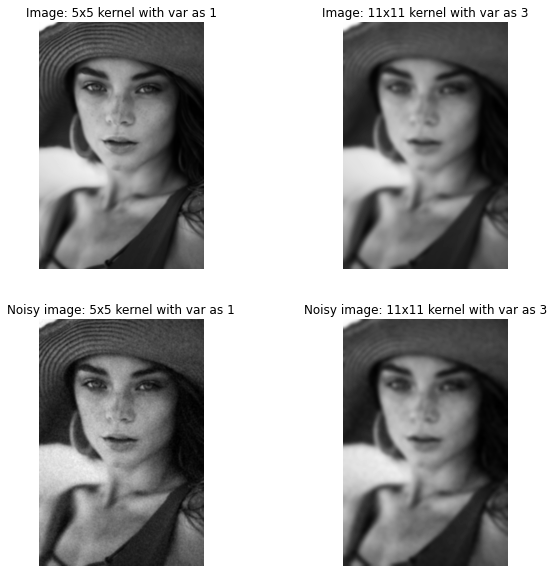

In [ ]:
def genGaussianKernel(width, sigma):
    
    # define your 2d kernel here
    kernel_2d = np.zeros((width, width))

    peak = int(width / 2)
    for x in range(width):
      for y in range(width):
        kernel_2d[x, y] = (1/(2*np.pi*sigma*sigma)) * (np.e ** (-((x-peak)**2 + (y - peak)**2)/(2 * sigma * sigma)))
        
    kernel_2d = kernel_2d / kernel_2d.sum(); # normalize kernel

    return kernel_2d

# Load images
img       = cv2.imread('SourceImages/pic.jpg', 0)
img_noise = cv2.imread('SourceImages/pic_noisy.jpg', 0)

# Generate Gaussian kernels
kernel_1 = genGaussianKernel(5, 1)      # 5 by 5 kernel with sigma of 1
kernel_2 = genGaussianKernel(11, 3)     # 11 by 11 kernel with sigma of 3



# Convolve with image and noisy image

res_img_kernel1 = cv2.filter2D(img, -1, kernel_1)
res_img_kernel2 = cv2.filter2D(img, -1, kernel_2)
res_img_noise_kernel1 = cv2.filter2D(img_noise, -1, kernel_1)
res_img_noise_kernel2 = cv2.filter2D(img_noise, -1, kernel_2)

# Write out result images
cv2.imwrite("Results/P1_01.jpg", res_img_kernel1)
cv2.imwrite("Results/P1_02.jpg", res_img_kernel2)
cv2.imwrite("Results/P1_03.jpg", res_img_noise_kernel1)
cv2.imwrite("Results/P1_04.jpg", res_img_noise_kernel2)

# Plot results
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.imshow(res_img_kernel1, 'gray')
plt.title('Image: 5x5 kernel with var as 1')
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(res_img_kernel2, 'gray')
plt.title('Image: 11x11 kernel with var as 3')
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(res_img_noise_kernel1, 'gray')
plt.title('Noisy image: 5x5 kernel with var as 1')
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(res_img_noise_kernel2, 'gray')
plt.title('Noisy image: 11x11 kernel with var as 3')
plt.axis("off")

plt.show()


- **Problem 1.b Median filter {15 pts}:** \\
(a)Write a function to generate an image with salt and pepper noise. The function takes two arguments, the input image and the probability that a pixel location has salt-pepper noise. A simple implementation can be to select pixel locations with probability 'p' where noise occurs and then with equal probability set the pixel value at those location to be 0 or 255.(**Hint: Use np.random.uniform()**) \\
(b)Write a function to implement a median filter. The function takes two arguments, an image and a window size(if window size is 'k', then a kxk window is used to determine the median pixel value at a location) and returns the output image. **Do not** use any inbuilt library (like scipy.ndimage_filter) to directly generate the result.  \\
For this question display the outputs for "probabilty of salt and pepper noise" argument in the **noisy_image_generator** function equal to 0.1 and 0.2, and median filter window size in **median_filter** function equal to 5x5. \\
(c) What is the Gaussian filter size (and sigma) that achieves a similar level of noise removal.


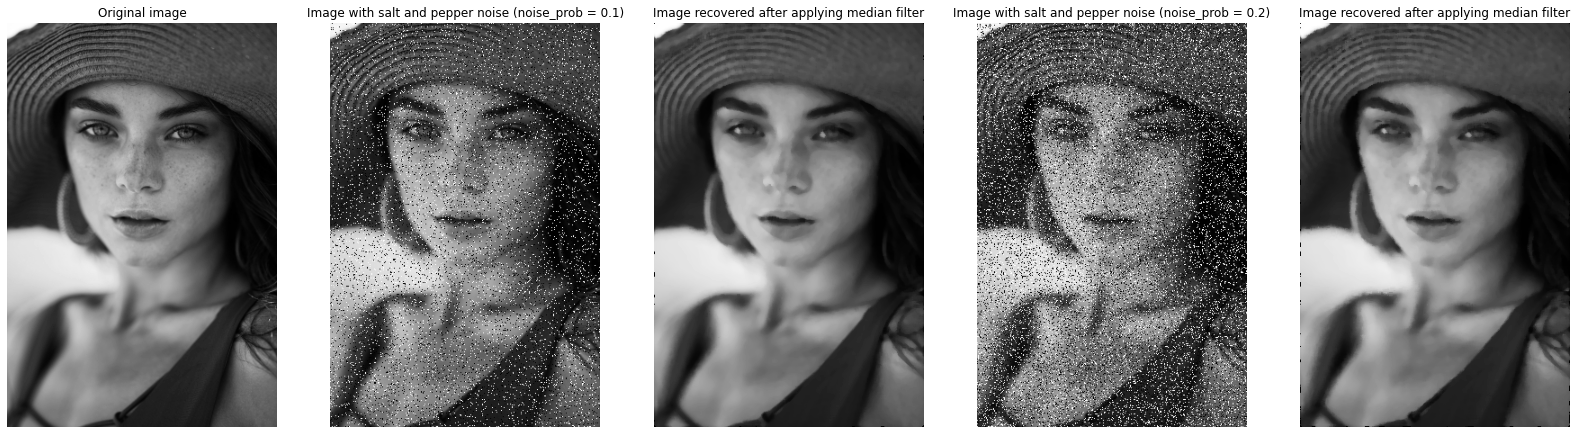

In [ ]:
# Part (a)
# Function to generate image with salt and pepper noise
def noisy_image_generator(img_in, probability = 0.1):
  # define your function here
  height, width = img_in.shape
  img_out = np.zeros((height, width))
  # noise 2d-array
  noise = np.random.uniform(0,1,(height, width))
  # for every pixel, replace with noise if below probability
  for x in range(height):
    for y in range(width):
      if noise[x,y] < probability:
        # color is random between black or white
        color = np.random.choice(2, 1)
        if color[0] == 1:
          img_out[x][y] = 255
        else:
          img_out[x][y] = 0
      else:
        img_out[x][y] = img_in[x][y]

  return img_out


# Part (b)
# Function to apply median filter(window size kxk) on the input image  
def median_filter(img_in, window_size = 5):
  # define your function here
  # make a border padding for median filter window
  k = int(window_size/2)
  borderedImage = cv2.copyMakeBorder(img_in, k, k, k, k, cv2.BORDER_CONSTANT, value=(0,0,0))
  height, width = borderedImage.shape
  # output image
  img_out = borderedImage.copy()

  for x in range(k, height - k):
    for y in range(k, width - k):
      median = np.median(borderedImage[x-k:x+k+1, y-k:y+k+1])
      img_out[x][y] = median
  
  # back to unbordered image
  result = img_out[k:height-k, k:width-k]

  return result
  
image_s_p1 = noisy_image_generator(img, probability = 0.1)  
result1 = median_filter(image_s_p1, window_size = 5)

image_s_p2 = noisy_image_generator(img, probability = 0.2)  
result2 = median_filter(image_s_p2, window_size = 5)

cv2.imwrite("Results/P1_05.jpg", result1)    
cv2.imwrite("Results/P1_06.jpg", result2)    

# Plot results
plt.figure(figsize = (28, 20))
plt.subplot(1, 5, 1)
plt.imshow(img, 'gray')
plt.title('Original image')
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(image_s_p1, 'gray')
plt.title('Image with salt and pepper noise (noise_prob = 0.1)')
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(result1, 'gray')
plt.title('Image recovered after applying median filter')
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(image_s_p2, 'gray')
plt.title('Image with salt and pepper noise (noise_prob = 0.2)')
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(result2, 'gray')
plt.title('Image recovered after applying median filter')
plt.axis("off")

plt.show()

*Part (c) Answer:*

A gaussian kernel with the size of 23 and a sigma of 7 will remove noise at the level of a median filter. But gaussian kernel cannot mimic the result of the median kernel because median filter filters/cleans the noise without losing essential features of the image, whereas a gaussian filter removes noise but blurs the image and removes essential features. The code below shows the results when a gaussian filter is applied to the salt and pepper noise image as a demonstration.

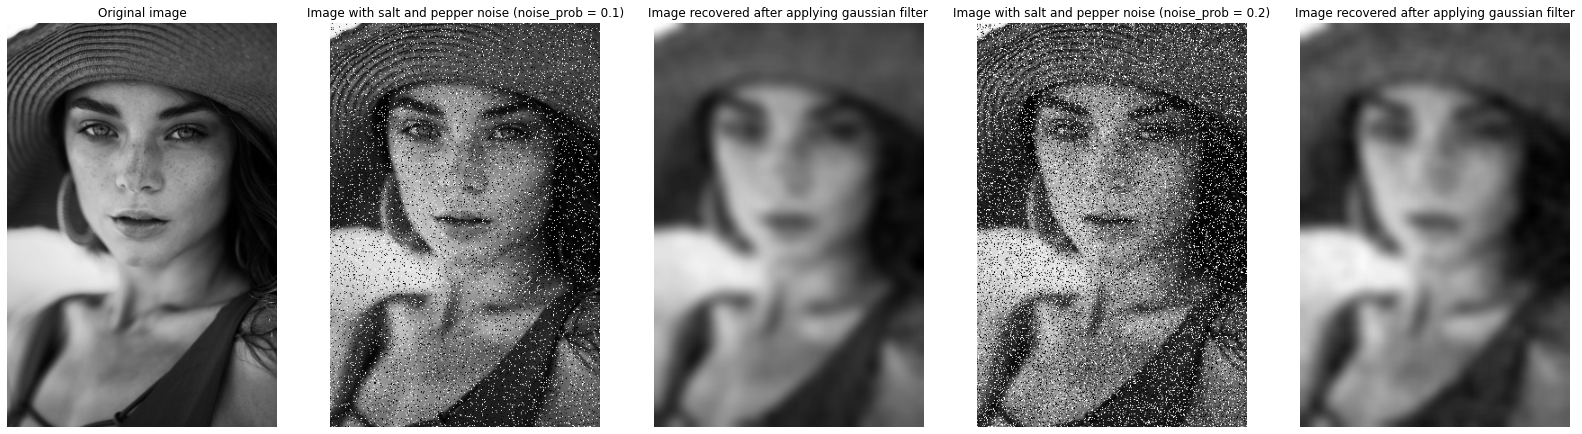

In [ ]:
# Part (c)
gaussianKernel = genGaussianKernel(23, 7)
gf_result1 = cv2.filter2D(image_s_p1, -1, gaussianKernel)
gf_result2 = cv2.filter2D(image_s_p2, -1, gaussianKernel)


# Plot results
plt.figure(figsize = (28, 20))
plt.subplot(2, 5, 1)
plt.imshow(img, 'gray')
plt.title('Original image')
plt.axis("off")

plt.subplot(2, 5, 2)
plt.imshow(image_s_p1, 'gray')
plt.title('Image with salt and pepper noise (noise_prob = 0.1)')
plt.axis("off")

plt.subplot(2, 5, 3)
plt.imshow(gf_result1, 'gray')
plt.title('Image recovered after applying gaussian filter')
plt.axis("off")

plt.subplot(2, 5, 4)
plt.imshow(image_s_p2, 'gray')
plt.title('Image with salt and pepper noise (noise_prob = 0.2)')
plt.axis("off")

plt.subplot(2, 5, 5)
plt.imshow(gf_result2, 'gray')
plt.title('Image recovered after applying gaussian filter')
plt.axis("off")

plt.show()

- **Problem 2 Separable convolutions {20 pts}:** The Gaussian kernel is separable, which means that convolution with a 2D Gaussian can be accomplished by convolving the image with two 1D Gaussians, one in the x direction and the other one in the y direction. Perform an 11x11 convolution with sigma = 3 from question 1 using this scheme. You can still use `filter2D` to convolve the images with each of the 1D kernels. Verify that you get the same results with what you did with 2D kernels by computing the difference image between the results from the two methods. This difference image should be close to black. Include your code and results in your colab Notebook file. There is no output image from this part. Be sure to display the result images in the notebook.

---



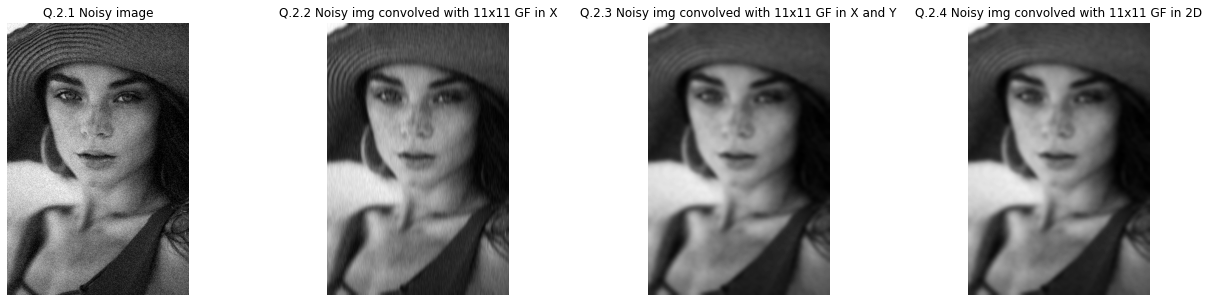

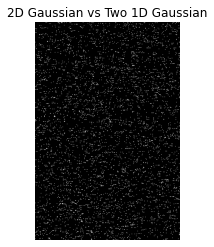

In [ ]:
def genGausKernel1D(length, sigma):
    
    # define you 1d kernel here
    kernel_1d = np.zeros((length,1))
    peak = int(length/2)
    for x in range(length):
      kernel_1d[x] = (1/np.sqrt(2*np.pi*sigma*sigma)) * (np.e ** (-((x-peak)**2)/(2*sigma*sigma)))
    
    kernel_1d = kernel_1d / kernel_1d.sum()
    
    return kernel_1d

# Generate two 1d kernels here
width = 11
sigma = 3
kernel_x = genGausKernel1D(width, sigma)
kernel_y = np.transpose(kernel_x)



# Generate a 2d 11x11 kernel with sigma of 3 here as before
kernel_2d = genGaussianKernel(width, sigma) 

# Convolve with img_noise
res_img_noise_kernel1d_x  = cv2.filter2D(img_noise, -1, kernel_x)
res_img_noise_kernel1d_xy = cv2.filter2D(res_img_noise_kernel1d_x, -1, kernel_y)
res_img_noise_kernel2d    = cv2.filter2D(img_noise, -1, kernel_2d)

# Plot results
plt.figure(figsize=(22, 5))
plt.subplot(1, 4, 1)
plt.imshow(img_noise, 'gray')
plt.title('Q.2.1 Noisy image')
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(res_img_noise_kernel1d_x, 'gray')
plt.title('Q.2.2 Noisy img convolved with 11x11 GF in X')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(res_img_noise_kernel1d_xy, 'gray')
plt.title('Q.2.3 Noisy img convolved with 11x11 GF in X and Y')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(res_img_noise_kernel2d, 'gray')
plt.title('Q.2.4 Noisy img convolved with 11x11 GF in 2D')
plt.axis("off")

plt.show()

# Compute the difference array here
img_diff = cv2.subtract(res_img_noise_kernel2d, res_img_noise_kernel1d_xy)
plt.title("2D Gaussian vs Two 1D Gaussian")
plt.axis("off")
plt.gray()
plt.imshow(img_diff)

- **Problem 3 Laplacian of Gaussian {25 pts}:** Convolve a 23 by 23 Gaussian of sigma = 3 with the discrete approximation to the Laplacian kernel [1 1 1; 1 -8 1; 1 1 1]. Plot the Gaussian kernel and 2D Laplacian of Gaussian using the `Matplotlib` function `plot`. Use the `Matplotlib` function `plot_surface` to generate a 3D plot of LoG. Do you see why this is referred to as the Mexican hat filter? Include your code and results in your Colab Notebook file. Apply the filter to the **Original image (img), Original image with Noise (img_noise), Original image filtered with 11x11 Gaussian kernel with var as 3 (Result image in Q1.a.2),  Original image with Noise filtered with 11x11 Gaussian kernel with var as 3 (Result image in Q1.a.4)**. Discuss the results in terms of edge accuracy and sensitivity to noise.

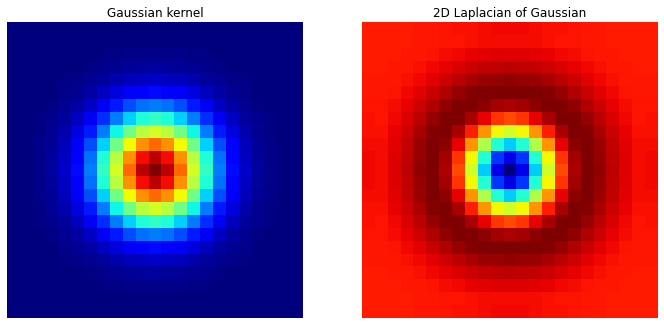

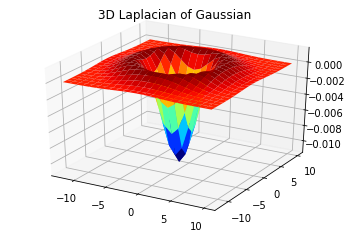

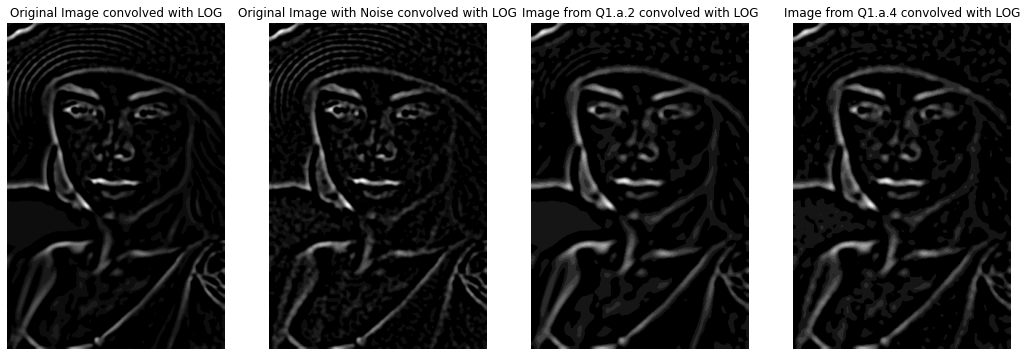

In [ ]:
width = 23
sigma = 3

# Create your Laplacian kernel
Laplacian_kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])


# Create your Gaussian kernel
Gaussian_kernel = genGaussianKernel(width, sigma)

# Create your Laplacian of Gaussian
LoG = cv2.filter2D(Gaussian_kernel, -1, Laplacian_kernel)

# Plot Gaussian and Laplacian
fig = plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(Gaussian_kernel, interpolation='none', cmap=cm.jet)
plt.title('Gaussian kernel')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(LoG, interpolation='none', cmap=cm.jet)
plt.title('2D Laplacian of Gaussian')
plt.axis("off")

# Plot the 3D figure of LoG
# Fill in your code here
X = [x for x in range(-len(LoG) // 2, len(LoG) // 2)]
Y = [y for y in range(-len(LoG[0]) // 2, len(LoG[0]) // 2)]
X, Y = np.meshgrid(X, Y)
surf = plt.figure().gca(projection='3d').plot_surface(X, Y, LoG, cmap=cm.jet)
plt.title('3D Laplacian of Gaussian')
plt.show()

img_LOG = cv2.filter2D(img, -1, LoG)
img_noise_LOG = cv2.filter2D(img_noise, -1, LoG)
res_img_kernel2_LOG = cv2.filter2D(res_img_kernel2, -1, LoG)
res_img_noise_kernel2_LOG = cv2.filter2D(res_img_noise_kernel2, -1, LoG)


# Plot results
plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1)
plt.imshow(img_LOG, 'gray')
plt.title('Original Image convolved with LOG')
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(img_noise_LOG, 'gray')
plt.title('Original Image with Noise convolved with LOG')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(res_img_kernel2_LOG, 'gray')
plt.title('Image from Q1.a.2 convolved with LOG')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(res_img_noise_kernel2_LOG, 'gray')
plt.title('Image from Q1.a.4 convolved with LOG')
plt.axis("off")

plt.show()


- **Problem 4 {25 pts}:** Implement the first two steps of the Canny edge extraction algorithm: cannyEnhancer(Gaussian filtering & finding magnitude and orientation of gradient) and nonMaxSuppression. Do not use any inbuilt library function for Canny edge detection. Include your code and results in your Colab Notebook file.



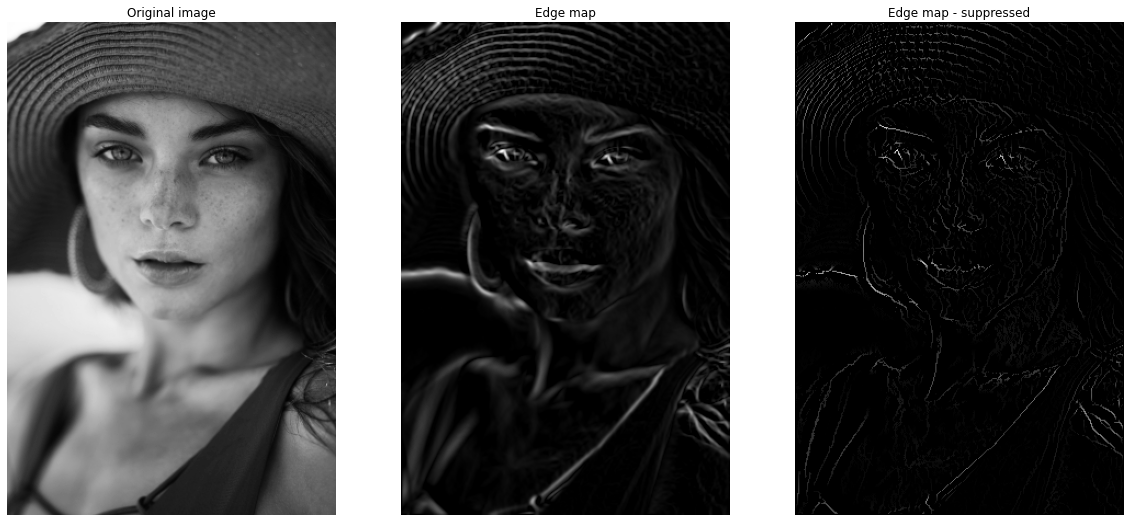

In [ ]:
def cannyEnhancer(img):
    grad_dir = np.zeros(img.shape)
    edge_map = np.zeros(img.shape)
    kernel = genGaussianKernel(11, 1)
    prewittX = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    prewittY = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    derivativeX = cv2.filter2D(kernel, -1, prewittX)
    derivativeY = cv2.filter2D(kernel, -1, prewittY)
    xEdges = cv2.filter2D(img, -1, derivativeX)
    yEdges = cv2.filter2D(img, -1, derivativeY)

    for x in range(img.shape[0]):
      for y in range(img.shape[1]):
        edge_map[x][y] = np.sqrt((xEdges[x][y]**2) + (yEdges[x][y]**2))
        grad_dir[x][y] = calculateAngle(xEdges[x][y], yEdges[x][y])

    return edge_map, grad_dir

def nonMaxSuppression(edge_map, grad_dir):
    edge_map_supp = np.zeros(edge_map.shape)
    
    for x in range(1, edge_map.shape[0]-1):
     for y in range(1, edge_map.shape[1]-1):
       if ((grad_dir[x][y] >= 111 and grad_dir[x][y] <= 155) or (grad_dir[x][y] > -68 and grad_dir[x][y] <= -24)) and (edge_map[x][y] >= edge_map[x+1][y+1] and edge_map[x][y] >= edge_map[x-1][y-1]) or (((grad_dir[x][y] <= -111 and grad_dir[x][y] > -155) or (grad_dir[x][y] >= 24 and grad_dir[x][y] <= 68)) and (edge_map[x][y] >= edge_map[x-1][y+1] and edge_map[x][y] >= edge_map[x+1][y-1])) or ((grad_dir[x][y] <= 180 and grad_dir[x][y] >= 155) or (grad_dir[x][y] >= -180 and grad_dir[x][y] <= -155) or (grad_dir[x][y] <= 24 or grad_dir[x][y] >= -24)) and (edge_map[x][y] >= edge_map[x][y-1] and edge_map[x][y] >= edge_map[x][y+1]) or ((grad_dir[x][y] >= 68 and grad_dir[x][y] <= 111) or (grad_dir[x][y] <= -68 and grad_dir[x][y] > -111)) and (edge_map[x][y] >= edge_map[x-1][y] and edge_map[x][y] >= edge_map[x+1][y]):
           edge_map_supp[x][y] = edge_map[x][y]

    return edge_map_supp
  
def calculateAngle(x, y):
  return np.arctan2(y, x)*(180/np.pi) if x !=0 else 0


# Calculate Non-max suppression of edge map
edge_map, grad_dir = cannyEnhancer(img)
edge_map_supp = nonMaxSuppression(edge_map, grad_dir)

# Write out result images
cv2.imwrite("Results/P4_01.jpg", edge_map_supp)

plt.figure(figsize = (20, 10))
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Original image')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(edge_map, 'gray')
plt.title('Edge map')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(edge_map_supp, 'gray')
plt.title('Edge map - suppressed')
plt.axis("off")

plt.show()

- **[Bonus] Problem 5 Histogram equalization {15 pts}:** Refer to Szeliski's book on section 3.4.1, and within that section to eqn 3.9 for more information on histogram equalization. Getting the histogram of a grayscale image is incredibly easy with python. A histogram is a vector of numbers. Once you have the histogram, you can get the cumulative distribution function (CDF) from it. Then all you have left is to find the mapping from each value [0,255] to its adjusted value (just using the CDF basically). **DO NOT** use **cv2.equalizeHist()** directly to solve the exercise! We will expect to see in your code that you get the PDF and CDF, and that you manipulate the pixels directly (avoid a for loop, though). There will be one output image from this part which is the histogram equalized image. It will be compared against the ground truth.

True

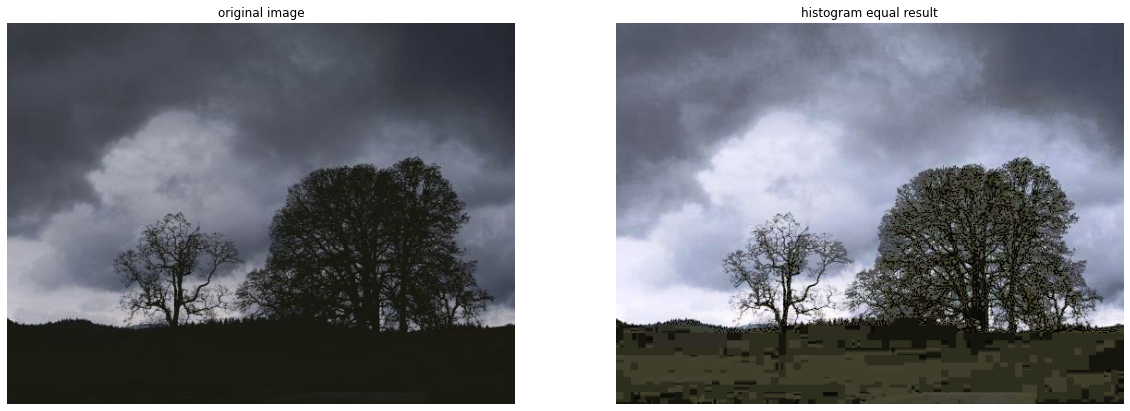

In [ ]:
def histogram_equalization(img_in):
    # Write histogram equalization here
    bin = 256
    himage = cv2.cvtColor(img_in, cv2.COLOR_BGR2HSV)
    hue, saturation, value = cv2.split(himage)
    flat_img = value.flatten()
   
    histogram = np.zeros(bin)
    for pixel in flat_img:
        histogram[pixel] += 1
    
    a = iter(histogram)
    b = [next(a)]
    for x in a:
        b.append(b[-1] + x)

    sum = np.array(b)
    sum = (sum - sum.min()) * (bin - 1) / (sum.max() - sum.min())
    sum = sum.astype('uint8')
    
    evalues = sum[flat_img]
    new_val = np.reshape(evalues, value.shape)

    img_out = cv2.merge([hue, saturation, new_val])
    img_out = cv2.cvtColor(img_out, cv2.COLOR_HSV2BGR)
    
    return True, img_out

# Read in input images
img_equal = cv2.imread('SourceImages/hist_equal.jpg', cv2.IMREAD_COLOR)

# Histogram equalization
succeed, output_image = histogram_equalization(img_equal)


# Plot results
fig = plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.imshow(img_equal[..., ::-1])
plt.title('original image')
plt.axis("off")


# Plot results2
plt.subplot(1, 2, 2)
plt.imshow(output_image[..., ::-1])
plt.title('histogram equal result')
plt.axis("off")


# Write out results
cv2.imwrite("Results/P5_01.jpg", output_image)